# Long Analysis: Single run 
Plots for the long-term performance temporal mean-Bias, zonal mean, spectra, zonal EOFs and PC autocorrelations, divergence, PDF, and return periods

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')

from src.inference.utils.long_metrics import return_period_bins, return_period_empirical, corr_truth_train_model
from src.inference.utils.plot_config import params, contourLevels, colormap

analysis_dir_train = '/glade/derecho/scratch/dpatel/SSL-2DTurb/BASE/BASE_seed_0_2phase_1000epochs/analysis/train'
analysis_dir_truth = '/glade/derecho/scratch/dpatel/SSL-2DTurb/TRUTH/IC1/analysis/truth'
analysis_dir_base = '/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128/long_analyses'
analysis_dir_pruned = '/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128_taylor/long_analyses/41.05'
#analysis_dir_edvit = '/glade/derecho/scratch/jshen/pruning-turbulence-vit/edvit0/base/long_analyses'

analysis_dir_arr = [
    analysis_dir_truth, 
    analysis_dir_train, 
    analysis_dir_base, 
    analysis_dir_pruned
]  

label = [r"Truth", r"Train", r"Emulator", r"Pruned"]
colors = ['-k', '--r', '-.b', ':g']
color=['k', 'r', 'b', 'g']

Lx, Ly = 2*np.pi, 2*np.pi
Nx, Ny = 256, 256

# Spectra

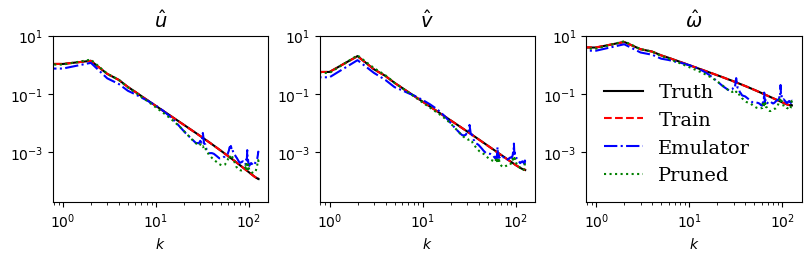

In [3]:
################### Spectra ###################

fig, axes = plt.subplots(1,3,figsize=(8, 2.5), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/spectra.npz")

    # U_spectra = data['spectra_U_angular_avg']
    # V_spectra = data['spectra_V_angular_avg']
    # Omega_spectra = data['spectra_Omega_angular_avg']
    # wavenumbers = data['wavenumber_angular_avg']

    U_spectra = data['spectra_U_zonal_avg']
    V_spectra = data['spectra_V_zonal_avg']
    Omega_spectra = data['spectra_Omega_zonal_avg']
    wavenumbers = data['wavenumber_zonal_avg']

    axes[0].loglog(wavenumbers[:-1], U_spectra[:-1], colors[i], label=label[i])
    axes[1].loglog(wavenumbers[:-1], V_spectra[:-1], colors[i], label=label[i])
    axes[2].loglog(wavenumbers[:-1], Omega_spectra[:-1], colors[i], label=label[i])


for ax in axes.flatten():
    ax.set_xlabel('$k$')
    ax.set_ylim([2e-5, 1e1])

axes[0].set_title('$\hat{u}$', rotation=0)
axes[1].set_title('$\hat{v}$', rotation=0)
axes[2].set_title('$\hat{\omega}$', rotation=0)

axes[2].legend(frameon=False)


# Zonal Mean

Zonal Mean
Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)
Corr U     : (0.99, 0.91, 0.87)
Corr Omega : (1.0, 0.98, 0.98)


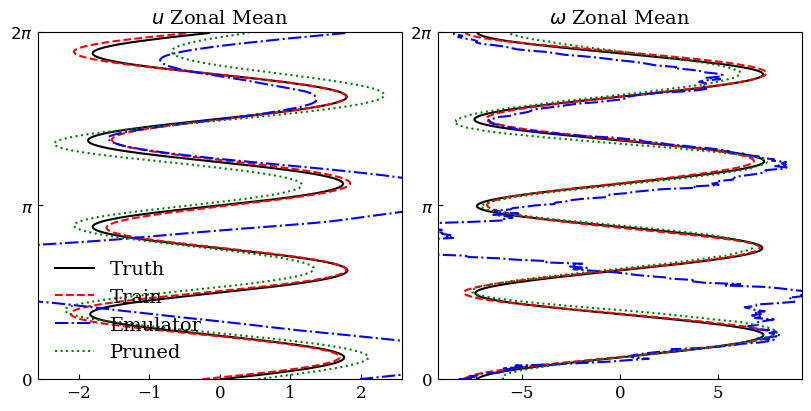

In [4]:
################### Zonal Mean ###################

fig, axes = plt.subplots(1,2,figsize=(8, 4), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

dx = Lx/Nx
y = np.linspace(0,2*np.pi-dx,Nx)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_mean.npz")

    U_mean_zonal = data['U_zonal_mean']
    Omega_mean_zonal = data['Omega_zonal_mean']

    axes[0].plot(U_mean_zonal, y, colors[i], label=label[i])
    axes[1].plot(Omega_mean_zonal, y, colors[i], label=label[i])

    if analysis_dir == analysis_dir_truth:

        U_zonal_mean_truth = U_mean_zonal
        Omega_zonal_mean_truth = Omega_mean_zonal

    elif analysis_dir == analysis_dir_train:
        U_zonal_mean_train = U_mean_zonal
        Omega_zonal_mean_train = Omega_mean_zonal

    else:
    #elif analysis_dir == analysis_dir_base:
        U_zonal_mean_emulator = U_mean_zonal
        Omega_zonal_mean_emulator = Omega_mean_zonal

axes[0].set_title(r'$u$ Zonal Mean')
axes[1].set_title(r'$\omega$ Zonal Mean')

for ax in axes.flatten():
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    ax.set_ylim([0, 2*np.pi])

U_mean_zonal_max = np.max(np.abs([U_zonal_mean_truth, U_zonal_mean_train, U_zonal_mean_emulator]))
Omega_mean_zonal_max = np.max(np.abs([Omega_zonal_mean_truth, Omega_zonal_mean_train, Omega_zonal_mean_emulator]))

axes[0].set_xlim([-1.1*U_mean_zonal_max, 1.1*U_mean_zonal_max])
axes[1].set_xlim([-1.1*Omega_mean_zonal_max, 1.1*Omega_mean_zonal_max])

axes[0].legend(frameon=False)

print('Zonal Mean')
print('Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)')
print('Corr U     :', corr_truth_train_model(U_zonal_mean_truth, U_zonal_mean_train, U_zonal_mean_emulator))
print('Corr Omega :', corr_truth_train_model(Omega_zonal_mean_truth, Omega_zonal_mean_train, Omega_zonal_mean_emulator))



# Temporal Mean

Text(0.5, 0.98, 'Temporal Mean')

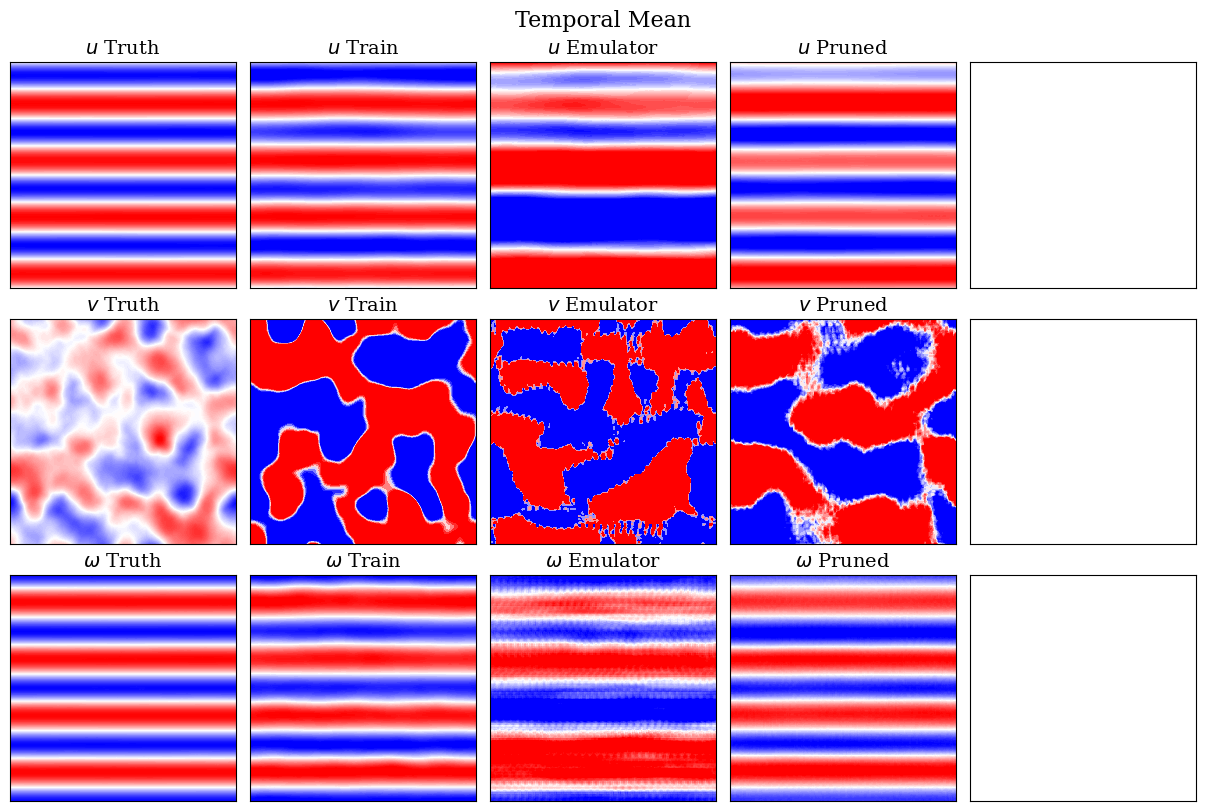

In [5]:
################### Sample Mean ###################


fig, axes = plt.subplots(3, 5, figsize=(12, 8), layout='constrained')
plt.rcParams.update(params)


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/temporal_mean.npz")
    # data = np.load(analysis_dir_truth + "/temporal_mean.npz")

    U_mean_sample = data['U_sample_mean']
    V_mean_sample = data['V_sample_mean']
    Omega_mean_sample = data['Omega_sample_mean']

    if i == 0:
        vmax_U = np.max(U_mean_sample)
        vmax_V = np.max(V_mean_sample)
        vmax_Omega = np.max(Omega_mean_sample)

    axes[0,i].contourf(U_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
    axes[1,i].contourf(V_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
    axes[2,i].contourf(Omega_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

    axes[0,i].set_title(rf"$u$ {label[i]}")
    axes[1,i].set_title(rf"$v$ {label[i]}")
    axes[2,i].set_title(rf"$\omega$ {label[i]}")

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle(r'Temporal Mean')

# Bias: Temporal Mean

Sample Mean Correlations
Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)
Corr U     : (0.99, 0.91, 0.87)
Corr Omega : (1.0, 0.98, 0.97)
Corr V     : (0.12, 0.34, 0.31)


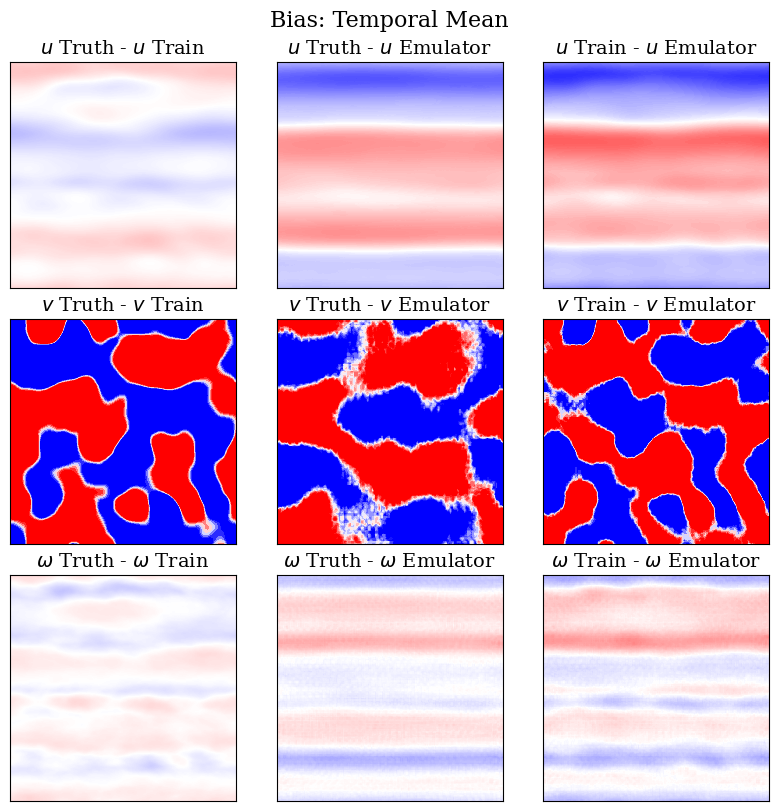

In [6]:
################### Sample Mean Difference ###################


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/temporal_mean.npz")
    # data = np.load(analysis_dir_truth + "/temporal_mean.npz")

    if analysis_dir == analysis_dir_truth:

        U_mean_sample_truth = data['U_sample_mean']
        V_mean_sample_truth = data['V_sample_mean']
        Omega_mean_sample_truth = data['Omega_sample_mean']

    elif analysis_dir == analysis_dir_train:

        U_mean_sample_train = data['U_sample_mean']
        V_mean_sample_train = data['V_sample_mean']
        Omega_mean_sample_train = data['Omega_sample_mean']

    else:#elif analysis_dir == analysis_dir_base:

        U_mean_sample_emulator = data['U_sample_mean']
        V_mean_sample_emulator = data['V_sample_mean']
        Omega_mean_sample_emulator = data['Omega_sample_mean']

    # if i == 0:
vmax_U = np.max(U_mean_sample_truth)
vmax_V = np.max(V_mean_sample_truth)
vmax_Omega = np.max(Omega_mean_sample_truth)

fig, axes = plt.subplots(3, 3, figsize=(8, 8), layout='constrained')
plt.rcParams.update(params)


axes[0,0].contourf(U_mean_sample_truth-U_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,0].contourf(V_mean_sample_truth-V_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,0].contourf(Omega_mean_sample_truth-Omega_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

axes[0,1].contourf(U_mean_sample_truth-U_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,1].contourf(V_mean_sample_truth-V_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,1].contourf(Omega_mean_sample_truth-Omega_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

axes[0,2].contourf(U_mean_sample_train-U_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,2].contourf(V_mean_sample_train-V_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,2].contourf(Omega_mean_sample_train-Omega_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)


fig.suptitle(r'Bias: Temporal Mean')
axes[0,0].set_title(r'$u$ Truth - $u$ Train')
axes[0,1].set_title(r'$u$ Truth - $u$ Emulator')
axes[0,2].set_title(r'$u$ Train - $u$ Emulator')

axes[1,0].set_title(r'$v$ Truth - $v$ Train')
axes[1,1].set_title(r'$v$ Truth - $v$ Emulator')
axes[1,2].set_title(r'$v$ Train - $v$ Emulator')

axes[2,0].set_title(r'$\omega$ Truth - $\omega$ Train')
axes[2,1].set_title(r'$\omega$ Truth - $\omega$ Emulator')
axes[2,2].set_title(r'$\omega$ Train - $\omega$ Emulator')

for ax in axes.flatten():
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])

print('Sample Mean Correlations')
print('Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)')
print('Corr U     :', corr_truth_train_model(U_mean_sample_truth, U_mean_sample_train, U_mean_sample_emulator))
print('Corr Omega :', corr_truth_train_model(Omega_mean_sample_truth, Omega_mean_sample_train, Omega_mean_sample_emulator))
print('Corr V     :', corr_truth_train_model(V_mean_sample_truth, V_mean_sample_train, V_mean_sample_emulator))


## EOF

EOF_U.shape: (256, 3)
EOF_U.shape: (256, 3)
EOF_U.shape: (256, 3)
EOF_U.shape: (256, 3)


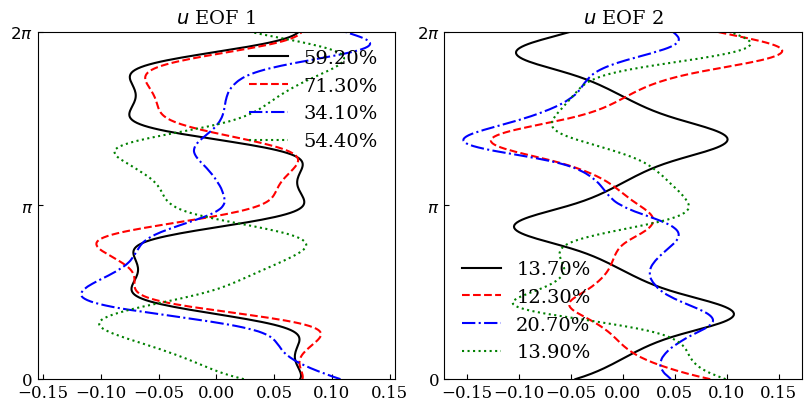

NameError: name 'plt_save_dir' is not defined

In [ ]:
################### EOF ###################

fig, axes = plt.subplots(1,2,figsize=(8, 4), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

    EOF_U = data["U_eofs"]
    if EOF_U.shape[0] != Ny:
        EOF_U = EOF_U.T
    exp_var_U = data["U_expvar"] # percent
    print(f'EOF_U.shape: {EOF_U.shape}')

    # EOF_Omega = data["Omega_eofs"]
    # if EOF_Omega.shape[0] != Ny:
    #     EOF_Omega = EOF_Omega.T
    # EOF_Omega = data["Omega_eofs"]
    # exp_var_Omega = data["Omega_expvar"] # percent

    exp_var_U = 100*np.round(exp_var_U, 3)
    # exp_var_Omega = 100*np.round(exp_var_Omega, 3)

    #print(exp_var_Omega)

    y = np.linspace(0, Lx, Ny)

    for count in range(2):
        if (i ==2 and count == 0) or (i == 1 and count == 1):
            EOF_U = -1 * EOF_U
        axes[count].plot(EOF_U[:,count], y, colors[i], label=f'{exp_var_U[count]:.2f}%')
        # axes[1,count].plot(EOF_Omega[:,count], y, colors[i], label=f'{exp_var_Omega[count]}%')

for ax in axes.flatten():
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    ax.set_ylim([0, 2*np.pi])


for count in range(2):
    axes[count].set_title(rf'$u$ EOF {count+1}')
    EOF_max = np.max(np.abs([EOF_U[:,count]]))
    axes[count].set_xlim([-1.4*EOF_max, 1.4*EOF_max])
    axes[count].legend(frameon=False)

    # axes[1,count].set_title(rf'$\omega$ EOF{count+1}')
    # EOF_max = np.max(np.abs([EOF_Omega[:,count]]))
    # axes[1,count].set_xlim([-1.4*EOF_max, 1.4*EOF_max])
    # axes[1,count].legend(frameon=False)

plt.show()
fig.savefig(plt_save_dir + '/zonal_EOFs.png', dpi=600, bbox_inches='tight')


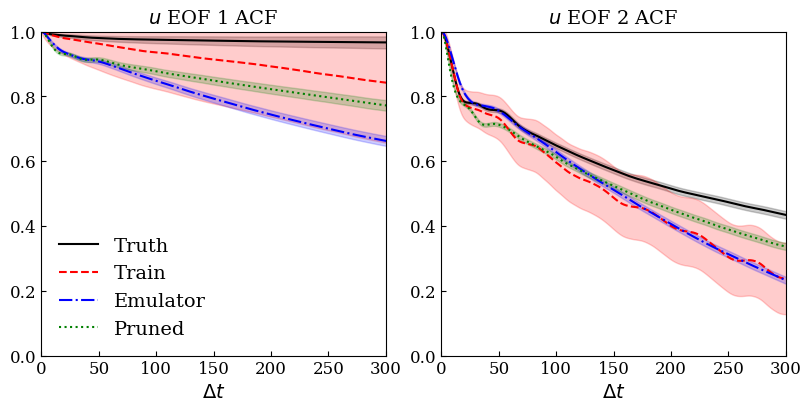

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

    PC_acf_U = data["U_pc_acf"]
    PC_acf_Omega = data["Omega_pc_acf"]

    for count in range(2):

        acf_U = PC_acf_U[count]
        acf_Omega = PC_acf_Omega[count]

        acf_U = PC_acf_U[count]
        acf_Omega = PC_acf_Omega[count]

        # Training data and emulation data are saved at different time steps
        if analysis_dir == analysis_dir_base or analysis_dir == analysis_dir_pruned or analysis_dir == analysis_dir_truth:
            time = np.linspace(0, acf_U['acf'].shape[0], acf_U['acf'].shape[0])
        else:
            time = np.linspace(0, acf_U['acf'].shape[0]/3, acf_U['acf'].shape[0])

        axes[count].plot(time, acf_U['acf'], colors[i], label=label[i])
        axes[count].fill_between(time, acf_U['confint'][:,0], acf_U['confint'][:,1], color=color[i], alpha=0.2)

        #axes[1,count].plot(time, acf_Omega['acf'], colors[i], label=label[i])
        #axes[1,count].fill_between(time, acf_Omega['confint'][:,0], acf_Omega['confint'][:,1], color=color[i], alpha=0.2)
        
        axes[count].set_title(rf'$u$ EOF {count+1} ACF')
        #axes[1,count].set_title(rf'$\omega$ PC{count+1} ACF')

        axes[count].set_xlabel('$\Delta t$')
        axes[count].set_ylim([0, 1])
        axes[count].set_xlim([0, 300])

axes[0].legend(frameon=False)


# Divergence

/glade/derecho/scratch/dpatel/SSL-2DTurb/TRUTH/IC1/analysis/truth
5.543001e-06
2.0909877e-07
/glade/derecho/scratch/dpatel/SSL-2DTurb/BASE/BASE_seed_0_2phase_1000epochs/analysis/train
5.56288e-06
1.9237972e-07
/glade/derecho/scratch/jshen/pruning-turbulence-vit/edvit0/base/long_analyses
0.3158936
0.028899847
/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128_taylor/long_analyses/41.05
0.25725642
0.020124914


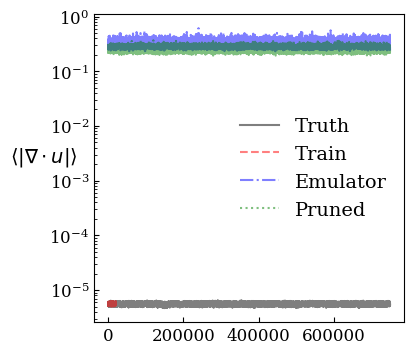

In [8]:
fig, axes = plt.subplots(1, figsize=(4, 4))
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    div = np.load(analysis_dir + "/div.npy")

    print(analysis_dir)

    print(div.mean())
    print(div.std())

    axes.semilogy(div, colors[i], label=label[i], alpha=0.5)


axes.set_ylabel(r'$ \langle |\nabla \cdot u |\rangle$', rotation=0)
axes.legend(frameon=False)

## Return Period

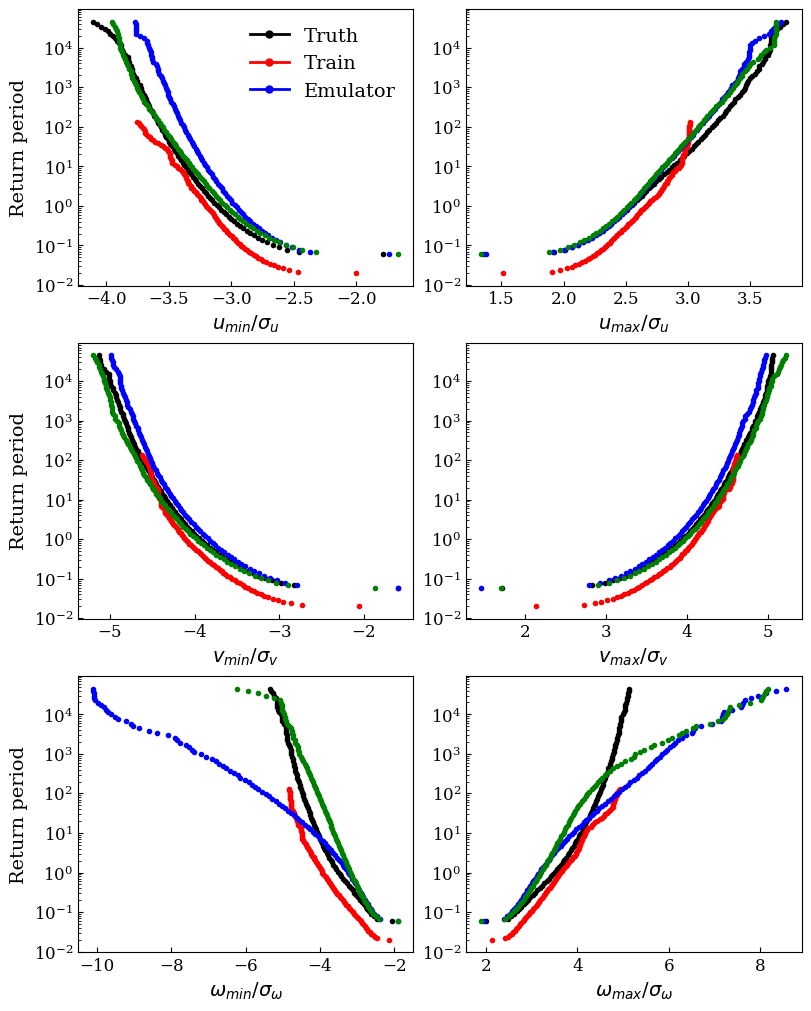

In [ ]:
dt_data = 0.06
markersize = 3
U_std = 2.34
V_std = 1.88
Omega_std = 10.41
bins = 100

# for return_period_type in ['extremes', 'extremes_anom']:
for return_period_type in ['extremes']:

    fig, axes = plt.subplots(3, 2, figsize=(8, 10), layout='constrained')
    plt.rcParams.update(params)

    for i, analysis_dir in enumerate(analysis_dir_arr):

        data = np.load(os.path.join(analysis_dir, f"{return_period_type}.npz"))

        U_max = data["U_max_arr"]/U_std
        V_max = data["V_max_arr"]/V_std
        Omega_max = data["Omega_max_arr"]/Omega_std

        U_min = data["U_min_arr"]/U_std
        V_min = data["V_min_arr"]/V_std
        Omega_min = data["Omega_min_arr"]/Omega_std

        if 'train' in analysis_dir:
            U_max = U_max[::3]
            V_max = V_max[::3]
            Omega_max = Omega_max[::3]
            U_min = U_min[::3]
            V_min = V_min[::3]
            Omega_min = Omega_min[::3]

        if analysis_dir == analysis_dir_train:
            dt = dt_data / 3
        else:
            dt = dt_data

        # Binning the data to calculate return periods; Plotting thousands of points can be slow
        # Use return_period_empirical function to calculate return periods without binning
        # e.g: U_max_return_period, U_amplitude_max = return_period_empirical(U_max, dt=dt)

        U_max_return_period, U_amplitude_max = return_period_bins(U_max, dt=dt, bins_num=bins)
        V_max_return_period, V_amplitude_max = return_period_bins(V_max, dt=dt, bins_num=bins)
        Omega_max_return_period, Omega_amplitude_max = return_period_bins(Omega_max, dt=dt, bins_num=bins)
        U_min_return_period, U_amplitude_min = return_period_bins(np.abs(U_min), dt=dt, bins_num=bins)
        V_min_return_period, V_amplitude_min = return_period_bins(np.abs(V_min), dt=dt, bins_num=bins)
        Omega_min_return_period, Omega_amplitude_min = return_period_bins(np.abs(Omega_min), dt=dt, bins_num=bins)

        axes[0,0].semilogy(-U_amplitude_min, U_min_return_period, 'o' + color[i],  markersize=markersize, label=label[i])
        axes[0,1].semilogy(U_amplitude_max, U_max_return_period, 'o' + color[i],  markersize=markersize, label=label[i])
        axes[1,0].semilogy(-V_amplitude_min, V_min_return_period, 'o' + color[i],  markersize=markersize, label=label[i])
        axes[1,1].semilogy(V_amplitude_max, V_max_return_period, 'o' + color[i],  markersize=markersize, label=label[i])
        axes[2,0].semilogy(-Omega_amplitude_min, Omega_min_return_period, 'o' + color[i],  markersize=markersize, label=label[i])
        axes[2,1].semilogy(Omega_amplitude_max, Omega_max_return_period, 'o' + color[i],  markersize=markersize, label=label[i])

        axes[0,0].set_ylabel('Return period')
        axes[1,0].set_ylabel('Return period')
        axes[2,0].set_ylabel('Return period')

        if return_period_type == 'extremes':
            axes[0,0].set_xlabel(r'$u_{min}/\sigma_u$')
            axes[0,1].set_xlabel(r'$u_{max}/\sigma_u$')
            axes[1,0].set_xlabel(r'$v_{min}/\sigma_v$')
            axes[1,1].set_xlabel(r'$v_{max}/\sigma_v$')
            axes[2,0].set_xlabel(r'$\omega_{min}/\sigma_{\omega}$')
            axes[2,1].set_xlabel(r'$\omega_{max}/\sigma_{\omega}$')

        elif return_period_type == 'extremes_anom':
            axes[0,0].set_xlabel(r'$\left(u-\langle u\rangle\right)_{min}/\sigma_u$')
            axes[0,1].set_xlabel(r'$\left(u-\langle u\rangle\right)_{max}/\sigma_u$')
            axes[1,0].set_xlabel(r'$\left(v-\langle v\rangle\right)_{min}/\sigma_v$')
            axes[1,1].set_xlabel(r'$\left(v-\langle v\rangle\right)_{max}/\sigma_v$')
            axes[2,0].set_xlabel(r'$\left(\omega-\langle \omega\rangle\right)_{min}/\sigma_{\omega}$')
            axes[2,1].set_xlabel(r'$\left(\omega-\langle \omega\rangle\right)_{max}/\sigma_{\omega}$')

    # Use custom legend handles with dashed lines instead of marker symbols
    custom_lines = [
        plt.Line2D([0], [0], color=color[0], marker='o', lw=2, label=label[0]),
        plt.Line2D([0], [0], color=color[1], marker='o', lw=2, label=label[1]),
        plt.Line2D([0], [0], color=color[2], marker='o', lw=2, label=label[2])
    ]
    axes[0,0].legend(handles=custom_lines, frameon=False)

    # Save figure with different filenames for anom True/False
    if return_period_type == 'extremes_anom':
        plt.suptitle('Anomalies')

# PDF

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(8, 3.5), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data_U = np.load(analysis_dir + "/PDF_U.npz")
    data_Omega = np.load(analysis_dir + "/PDF_Omega.npz")

    U_pdf = data_U['U_pdf']
    U_bins = data_U['U_bins']
    U_std = data_U['U_std']
    Omega_pdf = data_Omega['Omega_pdf']
    Omega_bins = data_Omega['Omega_bins']
    Omega_std = data_Omega['Omega_std']

    axes[0].semilogy(U_bins/U_std, U_pdf, colors[i], label=label[i])
    axes[1].semilogy(Omega_bins/Omega_std, Omega_pdf, colors[i], label=label[i])

axes[0].set_title(r'$u$ PDF')
axes[1].set_title(r'$\omega$ PDF')

plt.legend(frameon=False)

for ax in axes.flatten():
    ax.set_xlabel('$k$')
    ax.set_ylim([1e-7, 1])
    ax.set_xlim([-5, 5])

axes[0].set_xlabel(r'$u/\sigma_u$')
axes[1].set_xlabel(r'$\omega/\sigma_{\omega}$')

plt.legend(frameon=False)

plt.savefig(plt_save_dir + '/pdf.png', dpi=600, bbox_inches='tight')